# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`This is how we write code`

## Let's make some data to work on

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


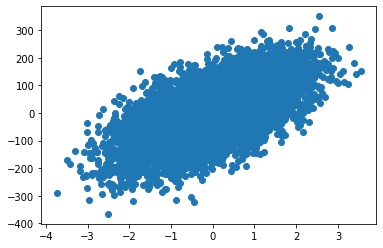

In [3]:
from sklearn.datasets import make_regression

# Regression Dataset
n = 10000
X, y = make_regression(n_samples=n, n_features=1, noise=70)
X = X.reshape(n)
datadict = {'data': X, 'target': y}
data = pd.DataFrame(data=datadict)
plt.scatter(X,y)
plt.show()

In [4]:
X = data.iloc[:,[0]].values
type(X)

numpy.ndarray

In [0]:
y = data.target.values

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler 
scaleObj = StandardScaler()
X_train = scaleObj.fit_transform(X_train)
X_test = scaleObj.transform(X_test)


In [9]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1)
])


model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001, 0.99),
    loss = 'mse',
    metrics = ['mse']
)

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler
def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 5836.3296 - mse: 5836.3296 - val_loss: 5243.8994 - val_mse: 5243.8994
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 5168.0571 - mse: 5168.0571 - val_loss: 5256.9980 - val_mse: 5256.9980
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 5109.0298 - mse: 5109.0298 - val_loss: 5208.0986 - val_mse: 5208.0986
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 5100.4653 - mse: 5100.4653 - val_loss: 5204.8838 - val_mse: 5204.8838
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 5092.0571 - mse: 5092.0571 - val_loss: 5189.7324 - val_mse: 5189.7324
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 5094.2554 - mse: 5094.2554 - val_loss: 5231.4390 - val_mse: 5231.4390
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 5124.6489 - mse: 5124.6489 - val_loss: 5326.0171 - val_

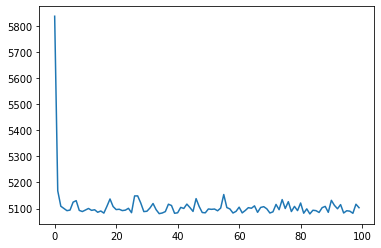

In [10]:
plt.plot(report.history['loss'], label="loss = SGD")

In [11]:
w = model.layers[0].get_weights()[0][0]
print(w)

[63.815567]


In [12]:
print(X.shape)
print(y.shape)
print(w.shape)

(10000, 1)
(10000,)
(1,)


In [13]:
print(type(X))
print(type(w))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


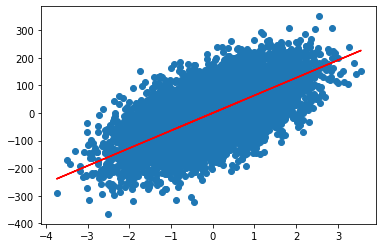

In [14]:
y_predicted = w.dot(X.transpose())
plt.scatter(X,y)
plt.plot(X,y_predicted, 'r', 5)
plt.show()

## Evaluate Regression

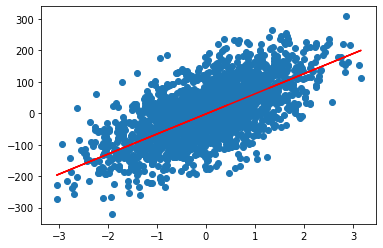

In [25]:
y_pred = model.predict(X_test).flatten()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

57.773892862866845


In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

5222.140755657213


In [22]:
print("Train eval: ", model.evaluate(X_train, y_train))
print("Test eval: ", model.evaluate(X_test, y_test))


250/250 [==============================] - 0s 1ms/step - loss: 5142.3340 - mse: 5142.3340
Train eval:  [5142.333984375, 5142.333984375]
63/63 [==============================] - 0s 1ms/step - loss: 5222.1406 - mse: 5222.1406
Test eval:  [5222.140625, 5222.140625]
